In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import sympy as sp
from sympy import symbols, lambdify, exp, LambertW

In [2]:
g = 1.16e-5
q = -1.16e-19

In [3]:
def V(r, mu, Z):
    epsilon = 1e-10  # Pequeña cantidad para evitar la división por cero
    potential = -g**2 * np.exp(-mu * r) / (r + epsilon) + Z * q**2 / (r + epsilon)
    potential = np.where(np.isinf(potential), np.nan, potential)
    return potential

In [4]:
r = np.linspace(0.01,0.05,1000)

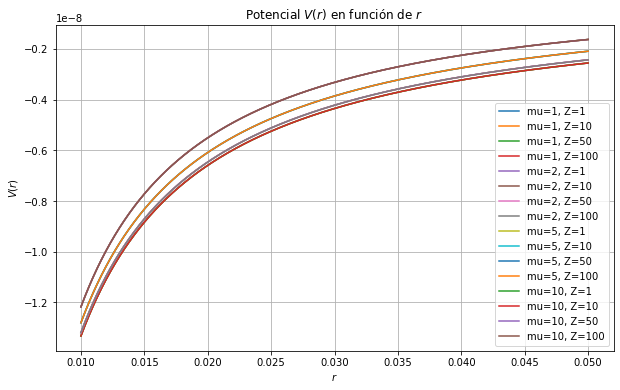

In [5]:
mu_values = [1, 2, 5, 10]
Z_values = [1, 10, 50, 100]

# Graficar V(r) para distintos mu y Z
plt.figure(figsize=(10, 6))
for mu in mu_values:
    for Z in Z_values:
        plt.plot(r, V(r, mu, Z), label=f'mu={mu}, Z={Z}')

plt.title('Potencial $V(r)$ en función de $r$')
plt.xlabel('$r$')
plt.ylabel('$V(r)$')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def energy(r,mu,Z):
    return V(r,mu,Z)

In [7]:
mu_opt = 5
Z_opt = 100

bounds = (0, 0.05)

result = minimize_scalar(energy, args=(mu_opt, Z_opt), bounds=bounds, method='bounded')

optimal_radius = result.x

print("Radio óptimo para mu=" +  str(mu_opt) + ", Z=" + str(Z_opt), " es: " + str(optimal_radius))

Radio óptimo para mu=5, Z=100  es: 5.320180123926299e-06


In [8]:


r, mu, Z, g, q = sp.symbols('r mu Z g q')

V = -g**2 * sp.exp(-mu * r) / r + Z * q**2 / r


dV_dr = sp.diff(V, r)

puntos_criticos = sp.solve(dV_dr, r)

print("Puntos críticos" + str(puntos_criticos))

expr_Z = puntos_criticos[0]

expr_V = -g**2 * exp(-mu * r) / r + Z * q**2 / r

energia_numerica = lambdify((r, mu, Z, q, g), expr_V, 'numpy')


mu_opt = 80  
Z_opt = 1  

result = minimize_scalar(lambda r: -energia_numerica(r, mu_opt, Z_opt, 1.6e-19, 1.16e-5), bounds=(0, 0.05), method='bounded')


r_max = result.x

print("Radio máximo para mu=" + str(mu_opt)+ ","+ " Z="+ str(Z_opt), " , el r_max es igual a " +str(r_max))


Puntos críticos[(-LambertW(-Z*q**2*exp(-1)/g**2) - 1)/mu]
Radio máximo para mu=80, Z=1  , el r_max es igual a 0.04999474178856194


In [9]:
Z_sol = expr_Z.subs({mu: 80, g: 9.8, q: 1.6e-19, r: r_max})

print("Valor de Z que compensa la interacción débil con la interacción electromagnética en r_max: \n" +  str(Z_sol))

Valor de Z que compensa la interacción débil con la interacción electromagnética en r_max: 
-LambertW(-2.6655560183257e-40*Z*exp(-1))/80 - 1/80


In [10]:
V = -g**2 * sp.exp(-mu * r) / r + Z * q**2 / r

E = sp.symbols('E')
A, B, C = sp.symbols('A B C')
k = sp.sqrt((2 * mu / 1**2) * (V - E))
u_outer = A * sp.sin(k * r) + B * sp.cos(k * r)

kappa = sp.sqrt((2 * mu / 1**2) * (E - V))
u_inner = C * sp.exp(-kappa * r)

T = sp.simplify((sp.Abs(C)**2) / (sp.Abs(A)**2))

print("Expresión para T: " + str(T))






Expresión para T: Abs(C**2/A**2)


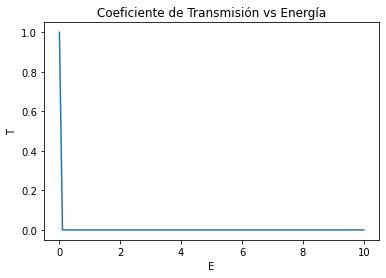

In [11]:

E, g, r, q = sp.symbols('E g r q')


T_expresion = sp.exp(-8*sp.sqrt(10)*sp.sqrt(E + g**2*sp.exp(-80*r)/r - 1.6e-40*q**2/r))


def evaluar_expresion(E_val):
    
    valores = {g: 1.16e-5, r: 0.04999474178856194, q: -1.16e-19} 
    
    valores[E] = E_val
    
    T_val = T_expresion.evalf(subs=valores)
    return T_val


T_func = np.vectorize(evaluar_expresion)


E_valores = np.linspace(0, 10, 100)
T_valores = T_func(E_valores)


plt.plot(E_valores, T_valores)
plt.xlabel('E')
plt.ylabel('T')
plt.title('Coeficiente de Transmisión vs Energía')
plt.show()



In [12]:
valores = {g: 1.16e-5, r: 0.04999474178856194, q: -1.16e-19} 

E = sp.symbols('E')


ecuacion = T_expresion.subs(valores) - 1

solucion = sp.solve(ecuacion, E)

print("El valor de energía que hace que T=1 es:")
for sol in solucion:
    print(sol.evalf())



El valor de energía que hace que T=1 es:
-0.986960440158253
-0.555165247610593
-0.246740110076551
-0.0616850275561255
-4.93169727403858e-11
